<a href="https://colab.research.google.com/github/lhayana/python-imd-project/blob/master/Politics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [ ]:
#importando bibliotecas.
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Planilha de Dados

In [ ]:
#Aqui estamos puxando o Arquivo "CSV" direto do repositorio do "Github".
news = pd.read_csv('https://raw.githubusercontent.com/lhayana/python-imd-project/master/dados/brazil-2018.csv', sep = ';', header=[0])     
#Lendo as 100 primeiras linhas do Arquivo.
news.head(100)

,id,texto,rotulo,fonte
0,1,"Salário Mínimo: R$ 950,00. Bolsa Presidiário: ...",FALSO,AOS FATOS
1,2,Empresa contratada pelo TSE para apuração dos ...,FALSO,AOS FATOS
2,3,"O Aloizio Mercadante, ministro da Educação, mo...",FALSO,AOS FATOS
3,4,Há um complô espalhando fake news descaradas e...,FALSO,AOS FATOS
4,5,"Somente em 2017, mais de 800 milhões de tonela...",VERDADE,AOS FATOS
...,...,...,...,...
95,96,"São Paulo cresceu no Ideb no primeiro ciclo, c...",VERDADE,AOS FATOS
96,97,O meu estado tem a menor mortalidade infantil ...,FALSO,AOS FATOS
97,98,"Quem tem um carro paga imposto, IPVA. Quem tem...",VERDADE,AOS FATOS
98,99,Participei de governos que geraram em 12 anos ...,VERDADE,AOS FATOS


#Controle de Dados

In [ ]:
#O texto do boato está com um traço (-) seguido do nome do candidato, então foi feita a separação.
news[["texto", "candidatos"]] = news["texto"].str.split(" - ", expand=True)
#Mas vale lembrar que nem todos os boatos estão atribuídos a algum candidato.

#"Limpando" os dados, substituindo quando há nomes diferentes para o mesmo candidato.
news['candidatos'] = news['candidatos'].replace(['Jair Bolsonaro'], 'Jair Bolsonaro (PSL)')
news['candidatos'] = news['candidatos'].replace(['Fernando Haddad.', 'Fernando Haddad', 'Fernando Haddad '], 'Fernando Haddad (PT)')
news['candidatos'] = news['candidatos'].replace(['Alvaro Dias (PODEMOS)', 'Alvaro Dias'], 'Alvaro Dias (Podemos)')
news['candidatos'] = news['candidatos'].replace(['Marina Silva', 'Marina Rede (Rede)'], 'Marina Silva (Rede)')
news['candidatos'] = news['candidatos'].replace(['Henrique Meirelles', 'Henrique Meireles (MDB)'], 'Henrique Meirelles (MDB)')

#Selecionando apenas as fake news.
fakes = news.loc[news['rotulo'] == 'FALSO']
#Selecionando apenas as Notícias "Verdadeiras".
verdade = news.loc[news['rotulo'] == 'VERDADE']

#retirando aqueles que, no fim, não foram candidatos à presidência
fakes = fakes.loc[fakes['candidatos'] != 'Jean Wyllys'] 
fakes = fakes.loc[fakes['candidatos'] != 'Manuela D’Ávila']

##Notícias "Fakes"

In [ ]:
#Tabela de Notícias "Fakes"
print(fakes)

      id  ...            candidatos
0      1  ...                  None
1      2  ...                  None
2      3  ...  Jair Bolsonaro (PSL)
3      4  ...  Jair Bolsonaro (PSL)
5      6  ...  Fernando Haddad (PT)
..   ...  ...                   ...
453  454  ...                  None
454  455  ...                  None
455  456  ...                  None
457  458  ...  Jair Bolsonaro (PSL)
458  459  ...  Jair Bolsonaro (PSL)

[237 rows x 5 columns]


##Notícias "Verdadeiras"

In [ ]:
#Tabela de Notícias "Verdadeiras"
print(verdade)

      id  ...            candidatos
4      5  ...  Jair Bolsonaro (PSL)
8      9  ...  Fernando Haddad (PT)
9     10  ...  Fernando Haddad (PT)
14    15  ...  Fernando Haddad (PT)
15    16  ...  Fernando Haddad (PT)
..   ...  ...                   ...
446  447  ...  Fernando Haddad (PT)
447  448  ...                  None
451  452  ...  Fernando Haddad (PT)
456  457  ...  Jair Bolsonaro (PSL)
459  460  ...  Jair Bolsonaro (PSL)

[221 rows x 5 columns]


#Plotagem de Gráficos

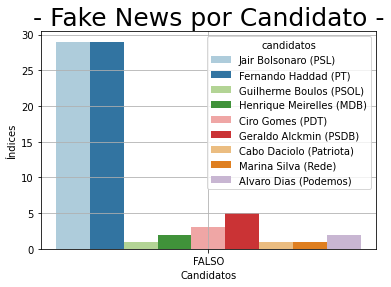

In [ ]:
#plotando um gráfico de barras com o pacote seaborn.
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
sns.countplot(hue='candidatos', x="rotulo", data = fakes, palette=(sns.color_palette("Paired")));
plt.title('- Fake News por Candidato -', color='black', fontsize= 25)
plt.xlabel('Candidatos', color='black')
plt.ylabel('Índices', color='black')
plt.grid(True)
linha = np.array([1])
plt.plot(linha)

Text(0, 0.5, 'Número de Notícias')

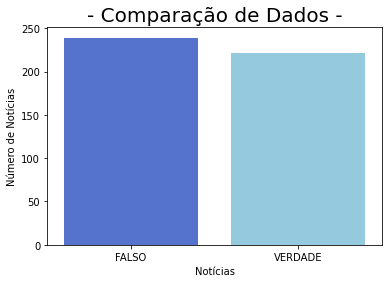

In [ ]:
#Plotando a quantidade total de boatos.
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
sns.countplot(x="rotulo" , data = news,  palette=(sns.color_palette(["royalblue","skyblue"])));
plt.title('- Comparação de Dados -', color='black', fontsize= 20)
plt.xlabel('Notícias', color='black')
plt.ylabel('Número de Notícias', color='black')

<Figure size 432x288 with 0 Axes>

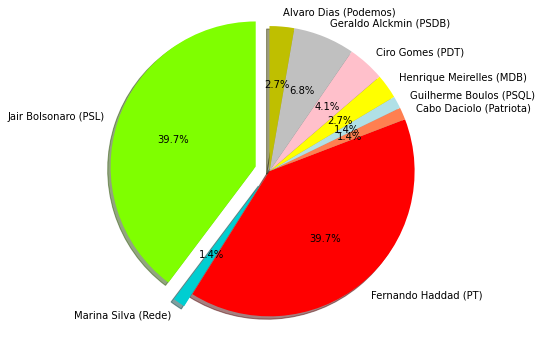

In [ ]:
labels = 'Jair Bolsonaro (PSL)', 'Marina Silva (Rede)', 'Fernando Haddad (PT)', 'Cabo Daciolo (Patriota)', 'Guilherme Boulos (PSQL)', 'Henrique Meirelles (MDB)', 'Ciro Gomes (PDT)', 'Geraldo Alckmin (PSDB)', 'Alvaro Dias (Podemos)'
sizes = [29, 1, 29, 1, 1, 2, 3, 5, 2]
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6, 6))

c = ['chartreuse', 'darkturquoise', 'red', 'coral', 'powderblue', 'yellow', 'pink', 'silver', 'y']

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=c)
ax1.axis('equal')

plt.show()

In [ ]:
#calcula porcentagem de boatos que são falsos
round((len(fakes)/len(news))*100, 2)

51.52

#Fonte

Fonte dos dados: https://www.kaggle.com/caiovms/brazilian-election-fake-news-2018